In [5]:
import numpy as np
import matplotlib.pyplot as plt
import descent
from ipywidgets import interact
%matplotlib inline

# Low-rank matrix approximation

In [7]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('china.jpg')

In [9]:
bw = flower.mean(axis=2) - np.mean(flower)
bw = bw / np.std(bw)

In [10]:
bwi = bw[100:200, 200:300]

In [11]:
from descent import admm

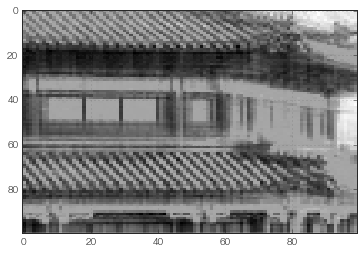

In [12]:
@interact(nucnorm=(0.,10.,1.,), sparse=(0.,2.,0.1))
def lrma(nucnorm=1., sparse=1.):
    opt = admm(bwi)
    opt.add('squared_error', bwi)
    opt.add('sparse', sparse)
    opt.add('nucnorm', nucnorm)
    opt.display = None
    opt.run(10)
    plt.imshow(opt.theta)